# Decision Tree Exercise

- **Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from prepare import titanic_pipeline, telco_pipeline

Found your sauce my bro
Found your sauce my bro
Found your sauce my bro


**1. What is your baseline prediction? What is your baseline accuracy?** *remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.*

In [2]:
train, val, test = titanic_pipeline()

Found your sauce my bro


In [3]:
train.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
748,0,male,19.0,1,0,53.1000,First,Southampton,0
45,0,male,29.0,0,0,8.0500,Third,Southampton,1
28,1,female,29.0,0,0,7.8792,Third,Queenstown,1
633,0,male,29.0,0,0,0.0000,First,Southampton,1
403,0,male,28.0,1,0,15.8500,Third,Southampton,0


In [4]:
train.shape

(623, 9)

In [5]:
val.shape

(134, 9)

In [6]:
# train = pd.get_dummies(train, columns = ['sex', 'class', 'embark_town'])
# train

# test = pd.get_dummies(test, columns = ['sex'], drop_first = True)
# test = pd.get_dummies(test, columns = ['class', 'embark_town'])
# test.head()

In [7]:
def one_hot_encode_columns(dataframes, columns_to_encode):
    encoded_dataframes = []
    
    for df in dataframes:
        encoded_df = pd.get_dummies(df, columns=columns_to_encode)
        encoded_dataframes.append(encoded_df)
    
    return encoded_dataframes

dataframes_to_encode = [train, val]
encoded_dataframes = one_hot_encode_columns(dataframes_to_encode, columns_to_encode=['sex', 'class', 'embark_town'])

train, val = encoded_dataframes

In [8]:
train.shape, val.shape

((623, 14), (134, 14))

In [9]:
X_train = train.drop(columns='survived')
y_train = train.survived

X_val = val.drop(columns='survived')
y_val = val.survived

In [10]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [11]:
y_train == 0 #baseline

748     True
45      True
28     False
633     True
403     True
       ...  
476     True
190    False
736     True
462     True
136    False
Name: survived, Length: 623, dtype: bool

In [12]:
base_acc = (y_train == 0).mean()
base_acc

0.6163723916532905

**2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)**

In [13]:
seed = 42

clf = DecisionTreeClassifier(max_depth=3, random_state=seed)

clf = clf.fit(X_train, y_train)

clf

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
clf.feature_importances_

array([0.09522747, 0.01326607, 0.        , 0.05263329, 0.        ,
       0.65091629, 0.        , 0.05668045, 0.        , 0.13127644,
       0.        , 0.        , 0.        ])

In [15]:
X_train.columns

Index(['age', 'sibsp', 'parch', 'fare', 'alone', 'sex_female', 'sex_male',
       'class_First', 'class_Second', 'class_Third', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [16]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)
y_pred[:5]

array([0, 0, 1, 0, 0])

In [17]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[:5]

array([[0.6375    , 0.3625    ],
       [0.88535032, 0.11464968],
       [0.21212121, 0.78787879],
       [0.6375    , 0.3625    ],
       [0.88535032, 0.11464968]])

In [18]:
y_pred_proba = clf.predict_proba(X_val)
y_pred_proba[:5]

array([[0.6375    , 0.3625    ],
       [0.88535032, 0.11464968],
       [0.88535032, 0.11464968],
       [0.6375    , 0.3625    ],
       [0.88535032, 0.11464968]])

In [19]:
clf.score(X_train, y_train)

0.8298555377207063

In [20]:
clf.score(X_val, y_val)

0.835820895522388

In [21]:
seed = 42
train_acc = []
val_acc = []
depth = []

for i in range(2, 6):

    clf = DecisionTreeClassifier(max_depth=i, random_state = seed)

    clf.fit(X_train, y_train)

    depth.append(i)

    train_acc.append(clf.score(X_train, y_train))

    val_acc.append(clf.score(X_val, y_val))

In [22]:
tree = pd.DataFrame({'max_depth' : depth,
                      'train_acc' : train_acc,
                      'val_acc' : val_acc})
tree

,max_depth,train_acc,val_acc
0,2,0.807384,0.798507
1,3,0.829856,0.835821
2,4,0.845907,0.835821
3,5,0.863563,0.820896


**3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.**

In [23]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.86


In [24]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on validation set: 0.82


In [25]:
# confusion matrix
confusion_matrix(y_train, y_pred)

array([[370,  14],
       [ 92, 147]])

In [26]:
y_train.value_counts()

0    384
1    239
Name: survived, dtype: int64

In [27]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       384
           1       0.91      0.62      0.73       239

    accuracy                           0.83       623
   macro avg       0.86      0.79      0.80       623
weighted avg       0.84      0.83      0.82       623



**4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.**

In [28]:
clf.score(X_train, y_train)

0.8635634028892456

In [29]:
clf.score(X_val, y_val)

0.8208955223880597

In [30]:
y_train = train.survived

import pandas as pd

labels = sorted(y_train.unique())

model = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

model.rename(
    columns={0: 'Died', 1: 'Survived'}, index={0: 'Died', 1: 'Survived'}, inplace=True,)

model

,Died,Survived
Died,370,14
Survived,92,147


**TP:** 147

**FP:** 14

**TN:** 370

**FN:** 92

**5. Run through steps 2-4 using a different max_depth value.**

In [31]:
seed = 42

clf = DecisionTreeClassifier(max_depth=9, random_state=seed)

clf = clf.fit(X_train, y_train)

clf

DecisionTreeClassifier(max_depth=9, random_state=42)

In [32]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)
y_pred[:5]

array([0, 0, 1, 0, 0])

In [33]:
clf.score(X_train, y_train)

0.9245585874799358

In [34]:
clf.score(X_val, y_val)

0.8134328358208955

In [35]:
seed = 42
train_acc = []
val_acc = []
depth = []

for i in range(2, 6):

    clf = DecisionTreeClassifier(max_depth=i, random_state = seed)

    clf.fit(X_train, y_train)

    depth.append(i)

    train_acc.append(clf.score(X_train, y_train))

    val_acc.append(clf.score(X_val, y_val))

In [36]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.86


In [37]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on validation set: 0.82


In [38]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       384
           1       0.98      0.82      0.89       239

    accuracy                           0.92       623
   macro avg       0.94      0.90      0.92       623
weighted avg       0.93      0.92      0.92       623



In [39]:
y_train = train.survived

import pandas as pd

labels = sorted(y_train.unique())

model = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

model.rename(
    columns={0: 'Died', 1: 'Survived'}, index={0: 'Died', 1: 'Survived'}, inplace=True,)

model

,Died,Survived
Died,380,4
Survived,43,196


**6. Which model performs better on your in-sample data?**

- My second model performed better on my in-sample data.

**7. Which model performs best on your out-of-sample data, the $validate$ set?**

- My first model performed better on my out-of-sample data.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Part 2**

**1. Work through these same exercises using the Telco dataset.**

In [40]:
train, val, test = telco_pipeline()

Found your sauce my bro


In [41]:
train.head(224)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
5609,Male,0,No,No,14,Yes,No,No,No,Yes,No,No,No,No,76.45,1117.55,No,Fiber optic,Month-to-month,Electronic check
2209,Male,0,No,No,5,Yes,No,No,No,Yes,No,Yes,Yes,Yes,70.00,347.4,Yes,DSL,One year,Mailed check
6919,Male,0,Yes,No,35,Yes,Yes,No,No,No,No,No,No,Yes,75.20,2576.2,Yes,Fiber optic,Month-to-month,Electronic check
2284,Male,0,Yes,No,58,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,86.10,4890.5,No,DSL,Two year,Electronic check
845,Female,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,49.60,114.7,Yes,DSL,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544,Male,0,Yes,No,3,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,49.65,No,None,Month-to-month,Bank transfer (automatic)
1749,Female,0,Yes,Yes,57,Yes,No,Yes,Yes,No,No,No,No,No,53.45,3053,No,DSL,One year,Electronic check
3183,Female,0,Yes,No,71,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,24.65,1710.15,No,None,Two year,Bank transfer (automatic)
2855,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,73.35,,No,DSL,Two year,Mailed check


In [42]:
def one_hot_encode_columns(dataframes, columns_to_encode):
    encoded_dataframes = []
    for df in dataframes:
        encoded_df = pd.get_dummies(df, columns=columns_to_encode)
        encoded_dataframes.append(encoded_df)
    return encoded_dataframes
dataframes_to_encode = [train, val]
encoded_dataframes = one_hot_encode_columns(dataframes_to_encode, columns_to_encode=['gender', 'partner', 'dependents', 'phone_service', 
                                                                                     'multiple_lines', 'online_security', 'online_backup', 
                                                                                     'device_protection', 'tech_support', 'streaming_tv', 
                                                                                     'streaming_movies', 'paperless_billing', 'churn',
                                                                                     'internet_service_type', 'contract_type', 'payment_type'])
train, val = encoded_dataframes

In [43]:
train.dtypes == 'object'

senior_citizen                            False
tenure                                    False
monthly_charges                           False
total_charges                              True
gender_Female                             False
gender_Male                               False
partner_No                                False
partner_Yes                               False
dependents_No                             False
dependents_Yes                            False
phone_service_No                          False
phone_service_Yes                         False
multiple_lines_No                         False
multiple_lines_No phone service           False
multiple_lines_Yes                        False
online_security_No                        False
online_security_No internet service       False
online_security_Yes                       False
online_backup_No                          False
online_backup_No internet service         False
online_backup_Yes                       

In [44]:
# replace blank values with NaN
train['total_charges'] = train['total_charges'].replace(" ", np.nan)
val['total_charges'] = val['total_charges'].replace(" ", np.nan)

# convert column to numeric
train['total_charges'] = pd.to_numeric(train['total_charges'], errors='coerce')
val['total_charges'] = pd.to_numeric(val['total_charges'], errors='coerce')

# calculate mean
train_mean_value = train['total_charges'].mean()
print("Mean:", train_mean_value)
val_mean_value = val['total_charges'].mean()
print("Mean:", val_mean_value)

# fill mean
train['total_charges'].fillna(train_mean_value, inplace=True)
val['total_charges'].fillna(val_mean_value, inplace=True)

Mean: 2311.096301564722
Mean: 2228.7591469194317


In [45]:
train.columns.tolist()

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Female',
 'gender_Male',
 'partner_No',
 'partner_Yes',
 'dependents_No',
 'dependents_Yes',
 'phone_service_No',
 'phone_service_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_No',
 'paperless_billing_Yes',
 'churn_No',
 'churn_Yes',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'contract_type_Month-

In [46]:
def drop_cols(dataframes, columns_to_drop):
    
    for df in dataframes:
       
        df.drop(columns=columns_to_drop, inplace=True)

    
    return dataframes


dataframes_list = [train, val]  
columns_to_remove = ['gender_Female','partner_No',
 'dependents_No',
 'phone_service_No',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'online_security_No',
 'online_security_No internet service',
 'online_backup_No',
 'online_backup_No internet service',
 'device_protection_No',
 'device_protection_No internet service',
 'tech_support_No',
 'tech_support_No internet service',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'paperless_billing_No',
 'churn_No', 'internet_service_type_None']  
modified_dataframes = drop_cols(dataframes_list, columns_to_remove)

In [47]:
train.shape, val.shape

((4930, 26), (1056, 26))

In [48]:
train = train.rename(columns={'churn_Yes' : 'churn'})
val = val.rename(columns={'churn_Yes' : 'churn'})

In [49]:
train.shape, val.shape

((4930, 26), (1056, 26))

In [50]:
X_train = train.drop(columns='churn')
y_train = train.churn

X_val = val.drop(columns='churn')
y_val = val.churn

In [51]:
train.shape, val.shape

((4930, 26), (1056, 26))

In [52]:
y_train.mode()

0    0
Name: churn, dtype: uint8

In [53]:
y_train == 0

5609     True
2209    False
6919    False
2284     True
845     False
        ...  
4312     True
1501     True
6331     True
2739     True
5679     True
Name: churn, Length: 4930, dtype: bool

In [54]:
base_acc = (y_train == 0).mean()
base_acc

0.734685598377282

In [55]:
X_train.nunique()

senior_citizen                               2
tenure                                      73
monthly_charges                           1440
total_charges                             4647
gender_Male                                  2
partner_Yes                                  2
dependents_Yes                               2
phone_service_Yes                            2
multiple_lines_Yes                           2
online_security_Yes                          2
online_backup_Yes                            2
device_protection_Yes                        2
tech_support_Yes                             2
streaming_tv_Yes                             2
streaming_movies_Yes                         2
paperless_billing_Yes                        2
internet_service_type_DSL                    2
internet_service_type_Fiber optic            2
contract_type_Month-to-month                 2
contract_type_One year                       2
contract_type_Two year                       2
payment_type_

In [56]:
seed = 42

clf = DecisionTreeClassifier(max_depth=3, random_state=seed)

clf = clf.fit(X_train, y_train)

clf

DecisionTreeClassifier(max_depth=3, random_state=42)

In [57]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)
y_pred[:5]

array([1, 0, 0, 0, 0], dtype=uint8)

In [58]:
clf.score(X_train, y_train)

0.7922920892494929

In [59]:
clf.score(X_val, y_val)

0.7964015151515151

In [60]:
seed = 42
train_acc = []
val_acc = []
depth = []

for i in range(2, 23):

    clf = DecisionTreeClassifier(max_depth=i, random_state = seed)

    clf.fit(X_train, y_train)

    depth.append(i)

    train_acc.append(clf.score(X_train, y_train))

    val_acc.append(clf.score(X_val, y_val))

In [61]:
tree = pd.DataFrame({'max_depth' : depth,
                      'train_acc' : train_acc,
                      'val_acc' : val_acc})
tree

,max_depth,train_acc,val_acc
0,2,0.762475,0.773674
1,3,0.792292,0.796402
2,4,0.794929,0.800189
3,5,0.807505,0.801136
4,6,0.813185,0.791667
5,7,0.826369,0.789773
6,8,0.844625,0.787879
7,9,0.867343,0.780303
8,10,0.883976,0.778409
9,11,0.904868,0.764205


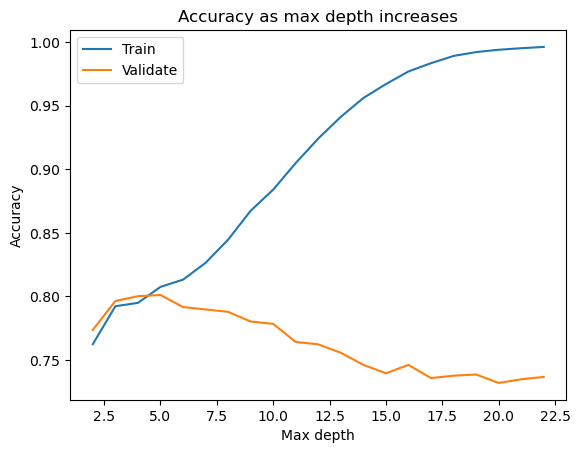

In [62]:
plt.plot(tree.max_depth, tree.train_acc, label = 'Train')
plt.plot(tree.max_depth, tree.val_acc, label = 'Validate')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.title('Accuracy as max depth increases')
plt.legend()
plt.show()

In [63]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 1.00


In [64]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on validation set: 0.74


In [65]:
# confusion matrix
confusion_matrix(y_train, y_pred)

array([[3403,  219],
       [ 805,  503]])

In [66]:
y_train = train.churn

import pandas as pd

labels = sorted(y_train.unique())

model = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

model.rename(
    columns={0: 'Not Churned', 1: 'Churned'}, index={0: 'Not Churned', 1: 'Churned'}, inplace=True,)

model

,Not Churned,Churned
Not Churned,3403,219
Churned,805,503


In [67]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3622
           1       0.70      0.38      0.50      1308

    accuracy                           0.79      4930
   macro avg       0.75      0.66      0.68      4930
weighted avg       0.78      0.79      0.77      4930



- I believe i generalized the data well, but how could i improve the performance maybe i could do some hyperparameter tuning or additional feature engineer more.

**2. Experiment with this model on other datasets with a higher number of output classes.**

The question is asking you to take the Decision Tree model that you've created on the telco dataset and test its performance on other datasets that have a higher number of output classes, also known as classes or categories. In the context of classification, "output classes" refer to the different categories or labels that the model is trying to predict.

Here's what you need to do for the next part of the exercise:

Obtain Datasets with More Output Classes: You need to find or generate datasets that have more than two classes for the target variable. For example, if your telco dataset was about churn prediction with classes "churn" and "not churn," datasets with more classes could be related to multi-class classification problems, like predicting different types of customer behavior, product preferences, or disease stages.

Apply the Model: Take your trained Decision Tree model and apply it to these new datasets with a higher number of output classes. This will involve making predictions on the new datasets using the model you've developed.

Evaluate Performance: Once you've applied the model to these new datasets, you should evaluate its performance. This typically involves calculating metrics such as accuracy, precision, recall, F1-score, and others depending on the specific characteristics of the datasets and the problem you're tackling.

Interpret Results: Analyze how well your Decision Tree model performs on these multi-class datasets compared to its performance on the original telco dataset. Pay attention to any differences in accuracy and other metrics. This analysis will help you understand how the model generalizes to different types of classification problems.

Adjust and Improve: Depending on the results of your experiments, you might need to fine-tune your Decision Tree model or explore other algorithms and techniques that are better suited for multi-class classification.

Obtaining or generating datasets with more output classes based on your existing telco dataset involves creating new target variables (output classes) that have multiple categories. Here's how you can go about it:

Identify Relevant Categories: Examine your telco dataset to identify columns that could be used as the basis for creating new target classes. These could be categorical columns that represent different types, categories, or behaviors.

Create New Categories: Using the identified columns, create new categories by grouping similar values together. For instance, if you have a "Service Type" column with values like "DSL," "Fiber optic," and "Cable," you could group these into categories like "Broadband" and "Cable."

Assign New Target Variable: Once you've created these new categories, you will have a new categorical column that can serve as your target variable. For example, if you had initially predicted "Churn" or "Not Churn," you can now predict the new categories you've created.

Preprocess and Encode: Just like you preprocessed your original telco dataset, you will need to preprocess the new dataset by encoding categorical variables, handling missing values, and performing any other necessary transformations.

Split into Train and Test Sets: Split your new dataset into training and testing sets, just like you did for your original telco dataset.

Train and Evaluate: Train your Decision Tree model on the new dataset, which now has more than two output classes. Then, evaluate its performance using appropriate multi-class classification metrics such as accuracy, precision, recall, and F1-score.

Repeat with Different Columns: You can repeat the process using different columns from your original dataset as the basis for creating new target categories. This will allow you to experiment with various multi-class classification scenarios.

Keep in mind that this process involves some creativity in defining new categories and determining which columns are suitable for creating multi-class problems. Additionally, it's important to ensure that the new target variable reflects a meaningful categorization that aligns with the goals of your analysis.

By following these steps, you'll be able to obtain or generate datasets with more output classes based on your telco dataset, which will give you the opportunity to assess the performance of your Decision Tree model in more complex classification scenarios.